In [33]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import exp
from math import log

In [34]:
#1


#2

It is best to use a one-tailed p-value for x^2 and |x| because they never have negative values, because they are squared or absolute value, therefore you only need to test for the possibility of a relationship on the right side. It will be skewed right, and therefore you should use a one tailed p-value. On the other hand, you should use a two-sided p-value for relative risk because it takes into account effect size and you should make a confidence interval from the data. You need a two sided p-value to make the confidence interval. Also, this data will be more bell-shaped so it is important to look for the possibility of a relationship on both the left and the right. It will be centered around 1 and can have positive and negative values. 

In [5]:
#3
numerator = 8117./(8117 + 620)
denominator = 8167/(8167 + 529)

rr = numerator/denominator 
rr
#The relative risk is very high, almost 1. This is so high because the proportion of those who took Vitamin E and didn't get cancer (numerator) is almost as high as the proportion of those who took the placebo and survived. A relative risk of 1 means that there is no effect. Because our relative risk value is almost one, we can conclude that there is likely no effect caused by Vitamin E in relation to cancer. 

0.989213844189003

In [37]:
#4



#5

Even though correlation does not mean causation, we still care about it because it sometimes helps us to predict the future. It allows us to do so without knowing the underlaying cause of the trend. This is important so we can determine what will happen next even if we don't know why. 

#6

While the study shows that there is a very high correlation between professors' salaries and the price of alcohol over the last 25 years, we can not draw a conclusion about causation. Correlation does not mean causation. One possible explanation is that as the value of money decreased over the course of the last 25 years, universities had to raise the salaries of their professors so they can live with a good quality of life and stores had to increase the cost of alcohol to maintain good profit margins. Another explanation could be that the demand for alcohol has gone up in the last 25 years so stores are charging more for it. This is a very plausible answer, as prices and salaries do increase over time. At the same time, professors salaries are also increasing because there is more demand because more people are going to college. This is also plausible, however less likely than the first explanation. Finally, professors have been demanding higher salaries over the course of the last 25 years while alcohol producers have gotten greedy and upped their prices. This could also be true, but is less likely than both the first two explanations. 


#7 part a

The independent variable is whether or not the patient received sterile or non sterile treatment. The dependent variable is whether or not the patient died. Both of these variables are categorical. 

In [41]:
#7 part b


#7 part c

The null hypothesis is that there is no difference in how many people survive if they are treated with the sterile process or the non-sterile process. 

In [13]:
#7 part d


In [14]:
#7 part e


In [15]:
#7 part f- 99% CI for relative risk NOTE: I JUST COPIED THIS FROM GROUPME, I HAVENT DONE ANY OF THE REST OF THIS PROBLEM YET SO THATS WHY IT ISNT RUNNING, I JUST WANTED TO SAVE IT WHILE I REMEMBERED
ster_box= ['S']*34 + ['D']*6
cont_box= ['S']*16 + ['D']*19

results= np.zeros(10000)
for i in range(10000):
    sterile_res= np.random.choice(ster_box, Sterile)
    control_res= np.random.choice(cont_box, Control)
    outcome= np.zeros({2, 2})
    outcome[0, 0]= np.sum(sterile_res == 'D')
    outcome[1, 0]= np.sum(sterile_res == 'S')
    outcome[0, 1]= np.sum(control_res == 'D')
    outcome[1, 1]= np.sum(control_res == 'S')
    results[i]= relRisk(outcome)

results.sort()
lower= log(results[49])
upper= log(results[9949])
CI_lower= exp(log(relobs)*2 - upper)
CI_upper= exp(log(relobs)*2 - lower)
print("The caclulated 99% confidence interval is:", (CI_lower, CI_upper))

NameError: name 'Sterile' is not defined

In [16]:
#7 part g


In [17]:
#7 part h


In [18]:
#8 part a


In [19]:
#8 part b


In [20]:
#8 part c


In [21]:
#8 part d


In [22]:
#8 part e


In [42]:
#9- uploading data
nenana= pd.read_csv("nenana-1.txt", sep= '\t')
nenana

Ice Breakup Day of Year  Years Since 1900  Year
0                    119.479                17  1917
1                    130.398                18  1918
2                    122.606                19  1919
3                    131.448                20  1920
4                    130.279                21  1921
..                       ...               ...   ...
98                   113.601               115  2015
99                   112.652               116  2016
100                  120.500               117  2017
101                  121.554               118  2018
102                  104.014               119  2019

[103 rows x 3 columns]

<AxesSubplot:>

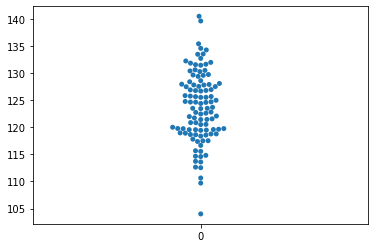

In [73]:
#9 part a- visualize data
sns.swarmplot(data= nenana["Ice Breakup Day of Year"])

In [25]:
#9 part b


In [26]:
#9 part c


In [27]:
#9 part d


In [28]:
#9 part e


In [29]:
#9 part f


In [60]:
#9 part g- line of best fit
regr= stats.linregress(nenana["Year"], nenana["Ice Breakup Day of Year"])
slope= regr.slope
intercept= regr.intercept

print(slope)
print(intercept)
print(min(nenana["Year"]))
print(max(nenana["Year"]))

-0.08441029301937356
289.7854275359135
1917
2019


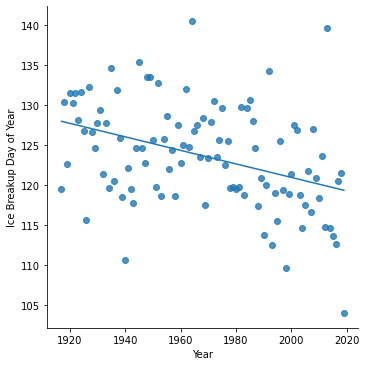

In [61]:
X_plot= np.linspace(1917, 2019, 100)
Y_plot= -0.08441029301937356*X_plot + 289.7854275359135

sns.lmplot(data= nenana, x= "Year", y= "Ice Breakup Day of Year", fit_reg=False)
plt.plot(X_plot, Y_plot)

[-0.14038740420832185, -0.02912926026048468]

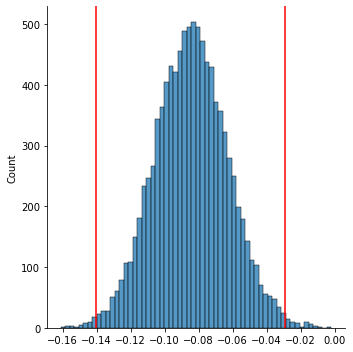

In [62]:
#9 part h- 99% CI for line of best fit
sims= np.zeros(10000)
for i in range(10000):
    newdata = nenana.sample(len(nenana), replace = True)
    reg= stats.linregress(newdata["Year"], newdata["Ice Breakup Day of Year"])
    sims[i]= reg.slope
sims.sort()
lower= 2*slope - sims[9949]
upper= 2*slope - sims[49]
p= sns.displot(sims, kde=False)
plt.axvline(lower, color = "red")
plt.axvline(upper, color = "red")
[lower,upper]

In [63]:
#9 part i


In [48]:
#10- uploading data
reaction= pd.read_csv("acid-phosphatase-corrected.csv")
reaction

Temperature  Initial Reaction Rate
0         298.0                   0.05
1         303.0                   0.07
2         308.0                   0.12
3         313.0                   0.20
4         313.0                   0.18
5         318.0                   0.34
6         323.0                   0.48
7         328.0                   0.79
8         333.0                   0.98
9         335.0                   1.02
10        333.5                   1.04
11        338.0                   1.10
12        343.0                   0.98
13        298.0                   0.04
14        343.7                   1.00
15        353.0                   0.53
16        353.0                   0.58
17        353.0                   0.61
18        338.0                   1.07
19        348.0                   0.74
20        348.0                   0.72

<AxesSubplot:>

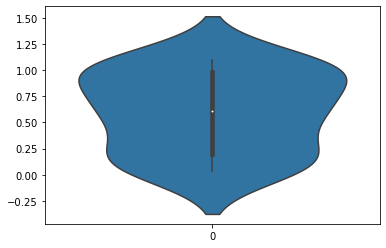

In [81]:
#10 part a- visualize data
sns.violinplot(data= reaction["Initial Reaction Rate"])

In [11]:
#10 part b


In [12]:
#10 part c


In [13]:
#10 part d


In [14]:
#10 part e


In [15]:
#10 part f


In [64]:
#10 part f- line of best fit
regr= stats.linregress(reaction["Temperature"], reaction["Initial Reaction Rate"])
slope= regr.slope
intercept= regr.intercept

print(slope)
print(intercept)
print(min(reaction["Temperature"]))
print(max(reaction["Temperature"]))

0.015257856886188529
-4.426794241937526
298.0
353.0


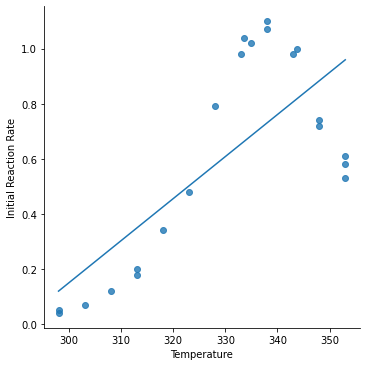

In [65]:
#10 part g- line of best fit
X_plot= np.linspace(298, 353, 100)
Y_plot= 0.015257856886188529*X_plot - 4.426794241937526

sns.lmplot(data= reaction, x= "Temperature", y= "Initial Reaction Rate", fit_reg=False)
plt.plot(X_plot, Y_plot)

[0.005167793391557696, 0.024583951244403678]

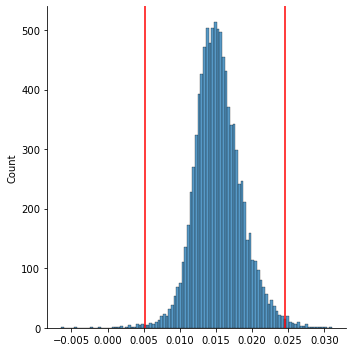

In [66]:
#10 part h- 99% CI for line of best fit
sims= np.zeros(10000)
for i in range(10000):
    newdata = reaction.sample(len(reaction), replace = True)
    reg= stats.linregress(newdata["Temperature"], newdata["Initial Reaction Rate"])
    sims[i]= reg.slope
sims.sort()
lower= 2*slope - sims[9949]
upper= 2*slope - sims[49]
p= sns.displot(sims, kde=False)
plt.axvline(lower, color = "red")
plt.axvline(upper, color = "red")
[lower,upper]

In [18]:
#10 part i
